In [1]:
import matplotlib.pyplot as plt
import os
import random
from PIL import Image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam

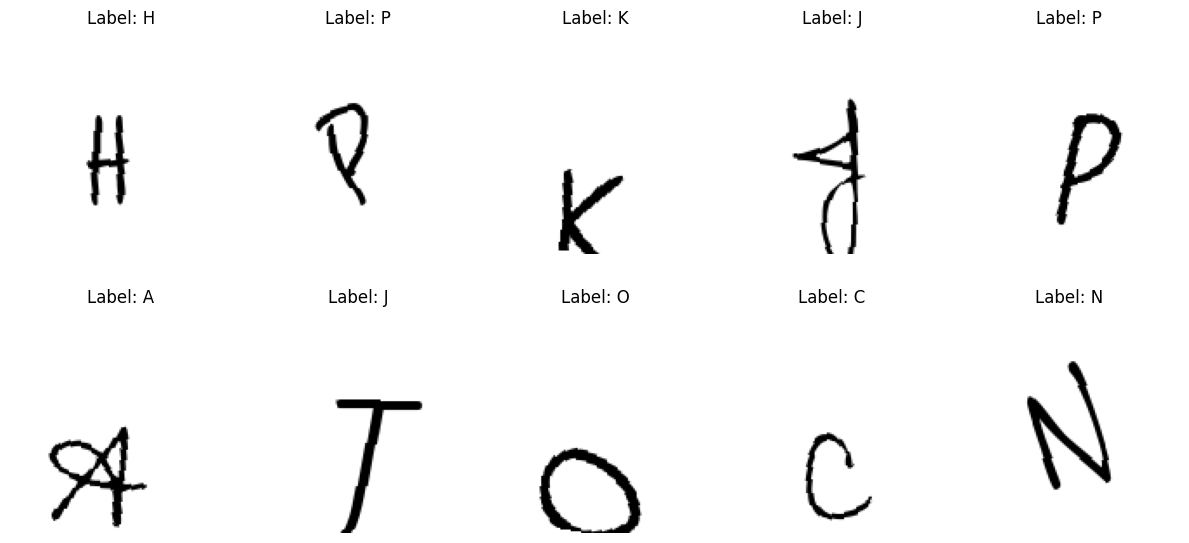

In [2]:
root_dir = "./char_dataset_128/"
sample_labels = sorted(os.listdir(root_dir))

plt.figure(figsize=(12, 6))
for i in range(10):
    label = random.choice(sample_labels)
    img_path = os.path.join(root_dir, label, random.choice(os.listdir(os.path.join(root_dir, label))))
    img = Image.open(img_path)
    plt.subplot(2, 5, i+1)
    plt.imshow(img)
    plt.title(f"Label: {label}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [3]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

In [4]:
IMG_SIZE = (128, 128)
BATCH_SIZE = 32
EPOCHS = 10
# Load training and validation datasets
train_gen = datagen.flow_from_directory(
    './char_dataset_128/',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training',
    shuffle=True
)
val_gen = datagen.flow_from_directory(
    './char_dataset_128/',
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)

Found 6240 images belonging to 26 classes.
Found 1560 images belonging to 26 classes.


In [ ]:
# Build the model
base_model = MobileNetV2(input_shape=(128, 128, 3), include_top=False, weights=None)
base_model.trainable = False  # Freeze initially
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(26, activation='softmax')  # 26 classes A-Z
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train
history = model.fit(
    train_gen,
    epochs=EPOCHS,
    validation_data=val_gen
)

Epoch 1/10


D:\WorkShit\Dictation-Tutor\env\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


195/195 ━━━━━━━━━━━━━━━━━━━━ 40s 183ms/step - accuracy: 0.0420 - loss: 3.2584 - val_accuracy: 0.0385 - val_loss: 3.2581
Epoch 2/10
 17/195 ━━━━━━━━━━━━━━━━━━━━ 26s 147ms/step - accuracy: 0.0378 - loss: 3.2582